## Only to run once during one session

In [1]:
## importing all libraries and dependencies
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import math
from heapq import merge
from random import *
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pt_SM = []
ls_runSM = []
safe_pt_SM = []
threat_pt_SM = []
safe_ls_runSM = []
threat_ls_runSM = []

In [3]:
data_dir = '/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/Non_SONA_data/'
dir_ext = [f for f in listdir(data_dir)]
pt_dir_lst = []
for i in dir_ext:
    pt_dir = data_dir + i
    pt_dir_lst.append(pt_dir)

## For each participant

In [4]:
pt_dir = pt_dir_lst[7]
pt_dir

'/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/new_batch/Non_SONA_data/emt_53'

In [5]:
encoding_files = []
tempdist_files = []
srcmem_files = []
for pt in pt_dir:
    pt_files = [f for f in listdir(pt_dir) if isfile(join(pt_dir, f))]

for a in pt_files:
    if a[-4:] == '.csv' and 'encoding' in a:
        encoding_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'temp_dist' in a:
        tempdist_files.append(pt_dir + '/' + a)
    if a[-4:] == '.csv' and 'src_mem' in a:
        srcmem_files.append(pt_dir + '/' + a)

In [6]:
#1 add in column for pt number and run number
#2 concat all the run csvs for each test
#3 drop NAs
len(pt_files)

48

In [7]:
srcmemdf = []
rn1 = srcmem_files[0]
dt1 = pd.DataFrame(pd.read_csv(rn1, header = 0))
dt1.columns = dt1.columns.str.replace(".", "_")
dt1['run_num'] = '1'
pt_num = dt1.participant[2]
type(dt1)
srcmemdf.append(dt1)
for b in srcmem_files[1:]:
    dt = pd.DataFrame(pd.read_csv(b, header = 0))
    dt.columns = dt.columns.str.replace(".", "_")
    dt['run_num'] = b[-32]
    srcmemdf.append(dt)
allSM_df = pd.concat(srcmemdf)
allSM_df = allSM_df.dropna(subset=['test_object', 'correct_context'])

In [9]:
allSM_df.columns

Index(['test_object', 'correct_context', 'tested_valence', 'same_val',
       'opp_val', 'same_foil', 'opp_foil', 'test1_thisRepN',
       'test1_thisTrialN', 'test1_thisN', 'test1_thisIndex', 'text_9_started',
       'key_resp_6_started', 'key_resp_6_keys', 'key_resp_6_rt',
       'text_11_started', 'key_resp_7_started', 'key_resp_7_keys',
       'key_resp_7_rt', 'text_13_started', 'key_resp_8_started',
       'key_resp_8_keys', 'key_resp_8_rt', 'text_12_started',
       'text_12_stopped', 'text_started', 'object_cue_started',
       'correct_cntxt_started', 'foil_same_started', 'foil_opp_started',
       'key_resp_started', 'corrAns', 'samekey', 'oppkey', 'key_resp_keys',
       'key_resp_corr', 'key_resp_rt', 'text_stopped', 'text_4_started',
       'session', 'participant', 'date', 'expName', 'psychopyVersion',
       'frameRate', 'Unnamed: 45', 'run_num', 'Unnamed: 41'],
      dtype='object')

In [10]:
r1= allSM_df.loc[allSM_df['run_num'] == '1']
r2= allSM_df.loc[allSM_df['run_num'] == '2']
r3= allSM_df.loc[allSM_df['run_num'] == '3']
r4= allSM_df.loc[allSM_df['run_num'] == '4']
r5= allSM_df.loc[allSM_df['run_num'] == '5']

##need to find the incorrect responses and then part them by same, opp, and safe/threat valence

#r1src = sum(r1.key_resp_corr)/len(r1.key_resp_corr)
#r2src = sum(r2.key_resp_corr)/len(r2.key_resp_corr)
#r3src = sum(r3.key_resp_corr)/len(r3.key_resp_corr)
#r4src = sum(r4.key_resp_corr)/len(r4.key_resp_corr)
#r5src = sum(r5.key_resp_corr)/len(r5.key_resp_corr)

#allSM_df.loc[allSM_df['run_num'] == '1', 'run_sm'] = r1src
#allSM_df.loc[allSM_df['run_num'] == '2', 'run_sm'] = r2src
#allSM_df.loc[allSM_df['run_num'] == '3', 'run_sm'] = r3src 
#allSM_df.loc[allSM_df['run_num'] == '4', 'run_sm'] = r4src
#allSM_df.loc[allSM_df['run_num'] == '5', 'run_sm'] = r5src

#runs_src = [r1src, r2src, r3src, r4src, r5src]
#runs_src = [r1src, r2src, r3src] ### FOR MISSING RUNS- modify in the code above as well
#print(runs_src)
#allSM_df['allrun_src'] = str(runs_src)

In [9]:
Sr1= (allSM_df['run_num'] == '1') & (allSM_df['tested_valence'] == 'SAFE')
Sr1 = allSM_df[Sr1]
Sr2= (allSM_df['run_num'] == '2') & (allSM_df['tested_valence'] == 'SAFE')
Sr2 = allSM_df[Sr2]
Sr3= (allSM_df['run_num'] == '3') & (allSM_df['tested_valence'] == 'SAFE')
Sr3 = allSM_df[Sr3]
Sr4= (allSM_df['run_num'] == '4') & (allSM_df['tested_valence'] == 'SAFE')
Sr4 = allSM_df[Sr4]
Sr5= (allSM_df['run_num'] == '5') & (allSM_df['tested_valence'] == 'SAFE')
Sr5 = allSM_df[Sr5]

Tr1= (allSM_df['run_num'] == '1') & (allSM_df['tested_valence'] == 'THREAT')
Tr1 = allSM_df[Tr1]
Tr2= (allSM_df['run_num'] == '2') & (allSM_df['tested_valence'] == 'THREAT')
Tr2 = allSM_df[Tr2]
Tr3= (allSM_df['run_num'] == '3') & (allSM_df['tested_valence'] == 'THREAT')
Tr3 = allSM_df[Tr3]
Tr4= (allSM_df['run_num'] == '4') & (allSM_df['tested_valence'] == 'THREAT')
Tr4 = allSM_df[Tr4]
Tr5= (allSM_df['run_num'] == '5') & (allSM_df['tested_valence'] == 'THREAT')
Tr5 = allSM_df[Tr5]

Sr1src = sum(Sr1.key_resp_corr)/len(Sr1.key_resp_corr)
Sr2src = sum(Sr2.key_resp_corr)/len(Sr2.key_resp_corr)
Sr3src = sum(Sr3.key_resp_corr)/len(Sr3.key_resp_corr)
Sr4src = sum(Sr4.key_resp_corr)/len(Sr4.key_resp_corr)
Sr5src = sum(Sr5.key_resp_corr)/len(Sr5.key_resp_corr)

Tr1src = sum(Tr1.key_resp_corr)/len(Tr1.key_resp_corr)
Tr2src = sum(Tr2.key_resp_corr)/len(Tr2.key_resp_corr)
Tr3src = sum(Tr3.key_resp_corr)/len(Tr3.key_resp_corr)
Tr4src = sum(Tr4.key_resp_corr)/len(Tr4.key_resp_corr)
Tr5src = sum(Tr5.key_resp_corr)/len(Tr5.key_resp_corr)

In [10]:
safe_runs_src = [Sr1src, Sr2src, Sr3src, Sr4src, Sr5src]
threat_runs_src = [Tr1src, Tr2src, Tr3src, Tr4src, Tr5src]

print(safe_runs_src, threat_runs_src)

allSM_df['safe_runsSM'] = str(safe_runs_src)
allSM_df['threat_runsSM'] = str(threat_runs_src)

[0.7407407407407407, 0.6296296296296297, 0.7166666666666667, 0.6111111111111112, 0.7666666666666667] [0.46296296296296297, 0.6481481481481481, 0.6458333333333334, 0.6851851851851852, 0.7083333333333334]


In [11]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
os.makedirs(pt_dt, exist_ok=True)  
allSM_df.to_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num, index = True, header = True )

In [12]:
allSM_df.columns

Index(['test_object', 'correct_context', 'tested_valence', 'same_val',
       'opp_val', 'same_foil', 'opp_foil', 'test1_thisRepN',
       'test1_thisTrialN', 'test1_thisN', 'test1_thisIndex', 'text_9_started',
       'key_resp_6_started', 'key_resp_6_keys', 'key_resp_6_rt',
       'text_11_started', 'key_resp_7_started', 'key_resp_7_keys',
       'key_resp_7_rt', 'text_13_started', 'key_resp_8_started',
       'key_resp_8_keys', 'key_resp_8_rt', 'text_12_started',
       'text_12_stopped', 'text_started', 'object_cue_started',
       'correct_cntxt_started', 'foil_same_started', 'foil_opp_started',
       'key_resp_started', 'corrAns', 'samekey', 'oppkey', 'key_resp_keys',
       'key_resp_corr', 'key_resp_rt', 'text_stopped', 'text_4_started',
       'session', 'participant', 'date', 'expName', 'psychopyVersion',
       'frameRate', 'Unnamed: 45', 'run_num', 'Unnamed: 41', 'run_sm',
       'allrun_src', 'safe_runsSM', 'threat_runsSM'],
      dtype='object')

In [13]:
pt_dt = 'C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/'
dt = pd.read_csv(pt_dt+"%s_ptSM_summary.csv"%pt_num)

In [14]:
shrt_df = pd.DataFrame({ 
                        'tested_valence': dt.tested_valence,
                        'same_val': dt.same_val,
                        'opp_val':dt.opp_val,
                        'resp': dt.key_resp_keys,
                        'acc':dt.key_resp_corr,
                        'rt': dt.key_resp_rt, 
                        'runSM': dt.run_sm,
                        'allruns': dt.allrun_src,
                        'corr_key': dt.corrAns,
                        'samekey':dt.samekey,
                        'oppkey':dt.oppkey,
                        'safe_runsSM': dt.safe_runsSM,
                        'threat_runsSM': dt.threat_runsSM})

In [15]:
srcmem_corr = []
srcmem_incor = []
srcmem_miss = []

safe_srcmem_corr = []
safe_srcmem_incor = []
safe_srcmem_miss = []

threat_srcmem_corr = []
threat_srcmem_incor = []
threat_srcmem_miss = []

all_safe = []
all_threat = []


for index, row in shrt_df.iterrows():
    if shrt_df.acc[index] == 1:
        srcmem_corr.append(shrt_df.tested_valence[index])
        
    if shrt_df.tested_valence[index] == 'SAFE':
        all_safe.append(shrt_df.tested_valence[index])
        
    if (shrt_df.acc[index] == 1) and (shrt_df.tested_valence[index] == 'SAFE'):
        safe_srcmem_corr.append(1)
        
    if shrt_df.tested_valence[index] == 'THREAT':
        all_threat.append(shrt_df.tested_valence[index])
        
    if (shrt_df.acc[index] == 1) and (shrt_df.tested_valence[index] == 'THREAT'):
        threat_srcmem_corr.append(1)
        
        
SM = len(srcmem_corr)/len(shrt_df)
pt_SM.append(SM)

ls_runSM.append(shrt_df.allruns[3])
safe_ls_runSM.append(shrt_df.safe_runsSM[3])
threat_ls_runSM.append(shrt_df.threat_runsSM[3]) 

print(len(all_safe))
print(len(all_threat))

print(len(safe_srcmem_corr))
print(len(threat_srcmem_corr))

prop_safe_corr = len(safe_srcmem_corr)/len(all_safe)
prop_threat_corr = len(threat_srcmem_corr)/len(all_threat)

safe_pt_SM.append(prop_safe_corr)
threat_pt_SM.append(prop_threat_corr)

282
258
196
162


## By pt valence

[0.6950354609929078, 0.627906976744186]


Text(0.5, 1.0, '53.0_Source memory by context valence')

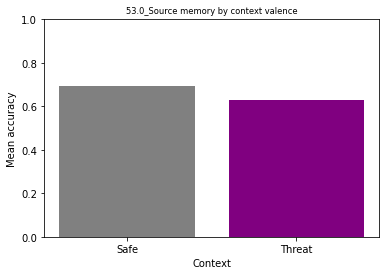

In [16]:
x = ['Safe', 'Threat']
y = [prop_safe_corr, prop_threat_corr]
print(y)
plt.bar(x, y, width=0.8, bottom=None, color = ['grey', 'purple'], align='center', data=None)
plt.ylim(0, 1)
plt.xlabel("Context", fontsize = "medium")
plt.xticks(fontsize = "medium")
plt.ylabel("Mean accuracy", fontsize = "medium")
plt.yticks(fontsize = "medium")
plt.title("%s_Source memory by context valence"%pt_num, fontsize = "small")

In [17]:
SMdf = pd.DataFrame({'Mean_accuracy':pt_SM,
                     'Mean_safe': safe_pt_SM,
                     'Mean_threat': threat_pt_SM,
                     'Runs_SM':ls_runSM,
                    'Safe_runsSM': safe_ls_runSM,
                    'Threat_runsSM': threat_ls_runSM})
SMdf.to_csv(pt_dt+"SMsummary_newbatch.csv", index = True, header = True)
SMdf

,Mean_accuracy,Mean_safe,Mean_threat,Runs_SM,Safe_runsSM,Threat_runsSM
0,0.662963,0.695035,0.627907,"[0.6018518518518519, 0.6388888888888888, 0.685...","[0.7407407407407407, 0.6296296296296297, 0.716...","[0.46296296296296297, 0.6481481481481481, 0.64..."


## Group Graphs

In [18]:
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rc('font', serif='Helvetica Neue') 
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['svg.fonttype']= 'none'
plt.rcParams.update({'font.size': 24})
plt.rc('xtick',labelsize=24)
plt.rc('ytick',labelsize=24)

In [20]:
sum_srcdt = pd.read_csv('C:/Users/ayesh/Desktop/Gradstuff/Temp_mem2022/summary_data/SMsummary.csv')
sum_srcdt.head()
len(sum_srcdt)

22

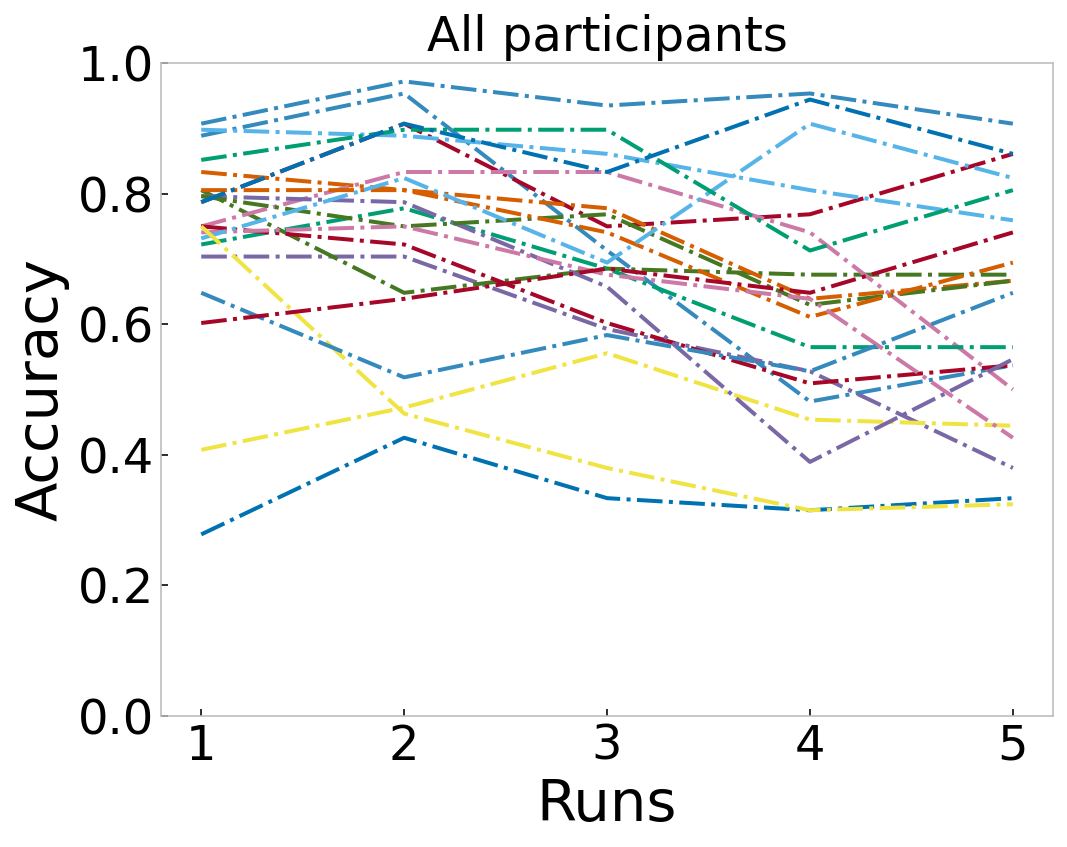

In [21]:
#runs = [1,2,3]
runs = [1,2,3,4,5]
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Runs_SM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="-.")
    plt.title("All participants", fontsize = 24)
plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.xticks(runs)
plt.ylim(0,1)
plt.show()

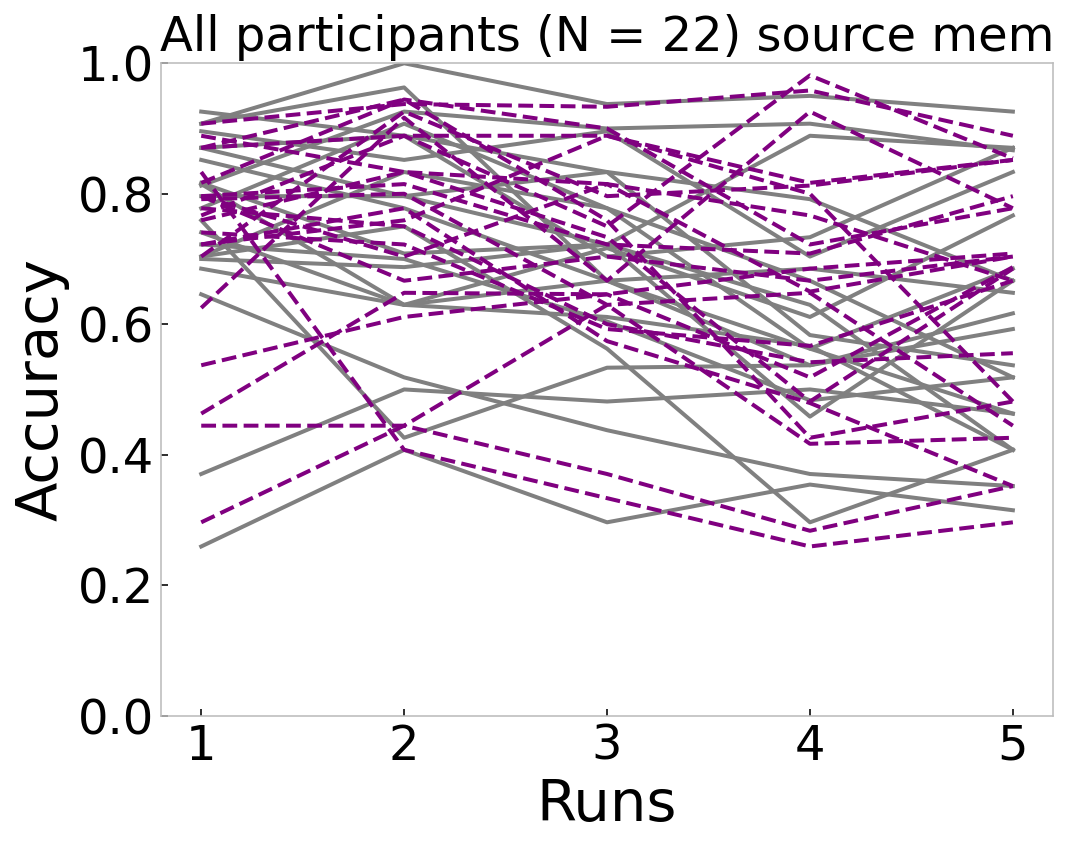

In [22]:
totalpts = len(sum_srcdt)
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Safe_runsSM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="-", color= "grey", label = "Safe")
    plt.title ("All participants (N = %s) source mem"%totalpts, fontsize = 24)
for index, row in sum_srcdt.iterrows():
    b = sum_srcdt.Threat_runsSM[index]
    g= b.replace('[','')
    h = g.replace(']','')
    res = [float(idx) for idx in h.split(', ')]
    plt.plot(runs, res, linestyle="--", color = "purple", label = "Threat")
    plt.title("All participants (N = %s) source mem"%totalpts, fontsize = 24)

plt.xlabel("Runs")
plt.ylabel("Accuracy")
plt.xticks(runs)
plt.ylim(0,1)
#plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
plt.show()

In [34]:
sum_srcdt

,Unnamed: 0,Mean_accuracy,Mean_safe,Mean_threat,Runs_SM,Safe_runsSM,Threat_runsSM
0,0,0.714815,0.733333,0.696296,"[0.8888888888888888, 0.9537037037037037, 0.712...","[0.9074074074074074, 0.9629629629629629, 0.666...","[0.8703703703703703, 0.9444444444444444, 0.759..."
1,1,0.814815,0.811594,0.818182,"[0.7870370370370371, 0.9074074074074074, 0.75,...","[0.8703703703703703, 0.8888888888888888, 0.703...","[0.7037037037037037, 0.9259259259259259, 0.796..."
2,2,0.581481,0.579710,0.583333,"[0.7037037037037037, 0.7037037037037037, 0.592...","[0.6851851851851852, 0.6296296296296297, 0.611...","[0.7222222222222222, 0.7777777777777778, 0.574..."
3,3,0.698148,0.688889,0.707407,"[0.8055555555555556, 0.6481481481481481, 0.685...","[0.8148148148148148, 0.6296296296296297, 0.666...","[0.7962962962962963, 0.6666666666666666, 0.703..."
4,4,0.744485,0.720430,0.769811,"[0.8333333333333334, 0.8055555555555556, 0.777...","[0.8703703703703703, 0.7962962962962963, 0.833...","[0.7962962962962963, 0.8148148148148148, 0.722..."
5,5,0.731481,0.731061,0.731884,"[0.75, 0.8333333333333334, 0.8333333333333334,...","[0.7777777777777778, 0.9074074074074074, 0.777...","[0.7222222222222222, 0.7592592592592593, 0.888..."
6,6,0.842593,0.821970,0.862319,"[0.8981481481481481, 0.8888888888888888, 0.861...","[0.9259259259259259, 0.8888888888888888, 0.833...","[0.8703703703703703, 0.8888888888888888, 0.888..."
7,7,0.662963,0.670455,0.655797,"[0.7222222222222222, 0.7777777777777778, 0.685...","[0.7037037037037037, 0.8333333333333334, 0.777...","[0.7407407407407407, 0.7222222222222222, 0.592..."
8,8,0.466667,0.462121,0.471014,"[0.4074074074074074, 0.4722222222222222, 0.555...","[0.37037037037037035, 0.5, 0.48148148148148145...","[0.4444444444444444, 0.4444444444444444, 0.629..."
9,9,0.337037,0.325758,0.347826,"[0.2777777777777778, 0.42592592592592593, 0.33...","[0.25925925925925924, 0.4074074074074074, 0.29...","[0.2962962962962963, 0.4444444444444444, 0.370..."


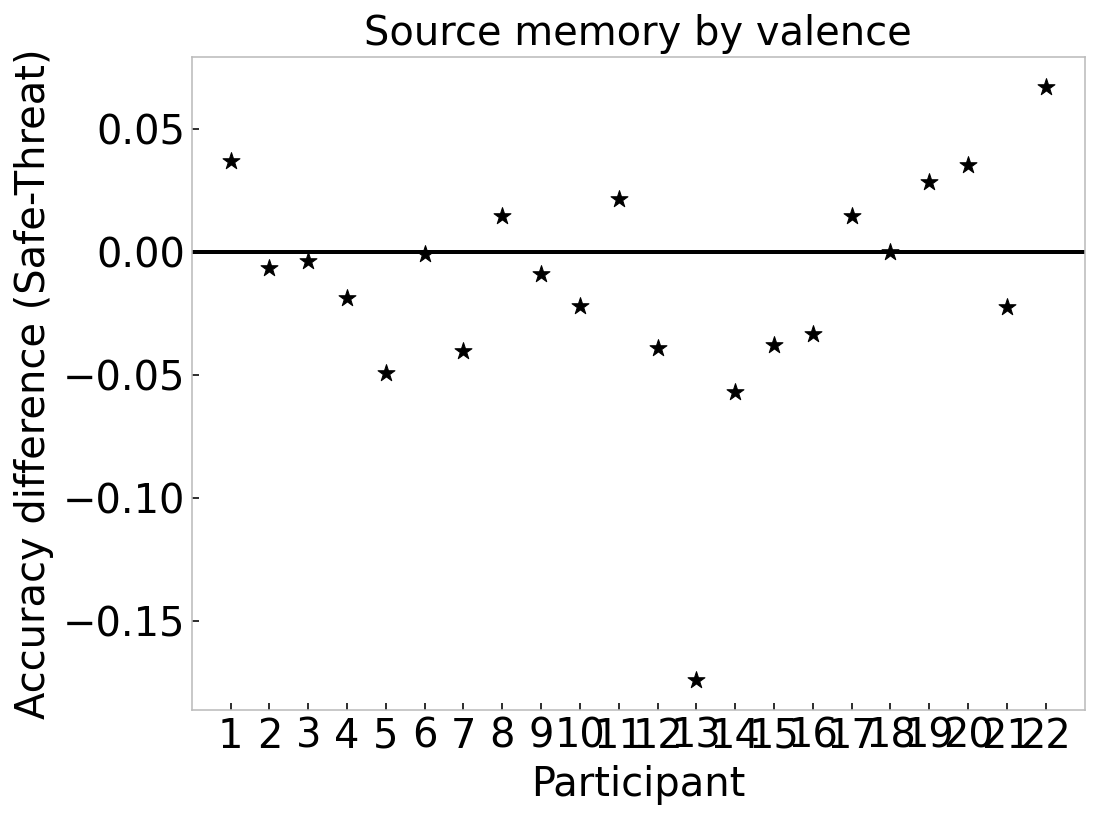

In [35]:

A = sum_srcdt.Mean_safe
B = sum_srcdt.Mean_threat
C = [a - b for a, b in zip(A, B)]
C
x_range = range(1, totalpts + 1)
plt.xlim (0, 23)
plt.xticks(x_range, fontsize = "small")
plt.yticks(fontsize = "small")
plt.scatter(x_range, C, marker='*', color = "black", s = 80)
plt.xlabel("Participant", fontsize = "small")
plt.ylabel("Accuracy difference (Safe-Threat)", fontsize = "small")
plt.title("Source memory by valence", fontsize = "small")
plt.axhline(y = 0.0, color = 'k', linestyle = '-')

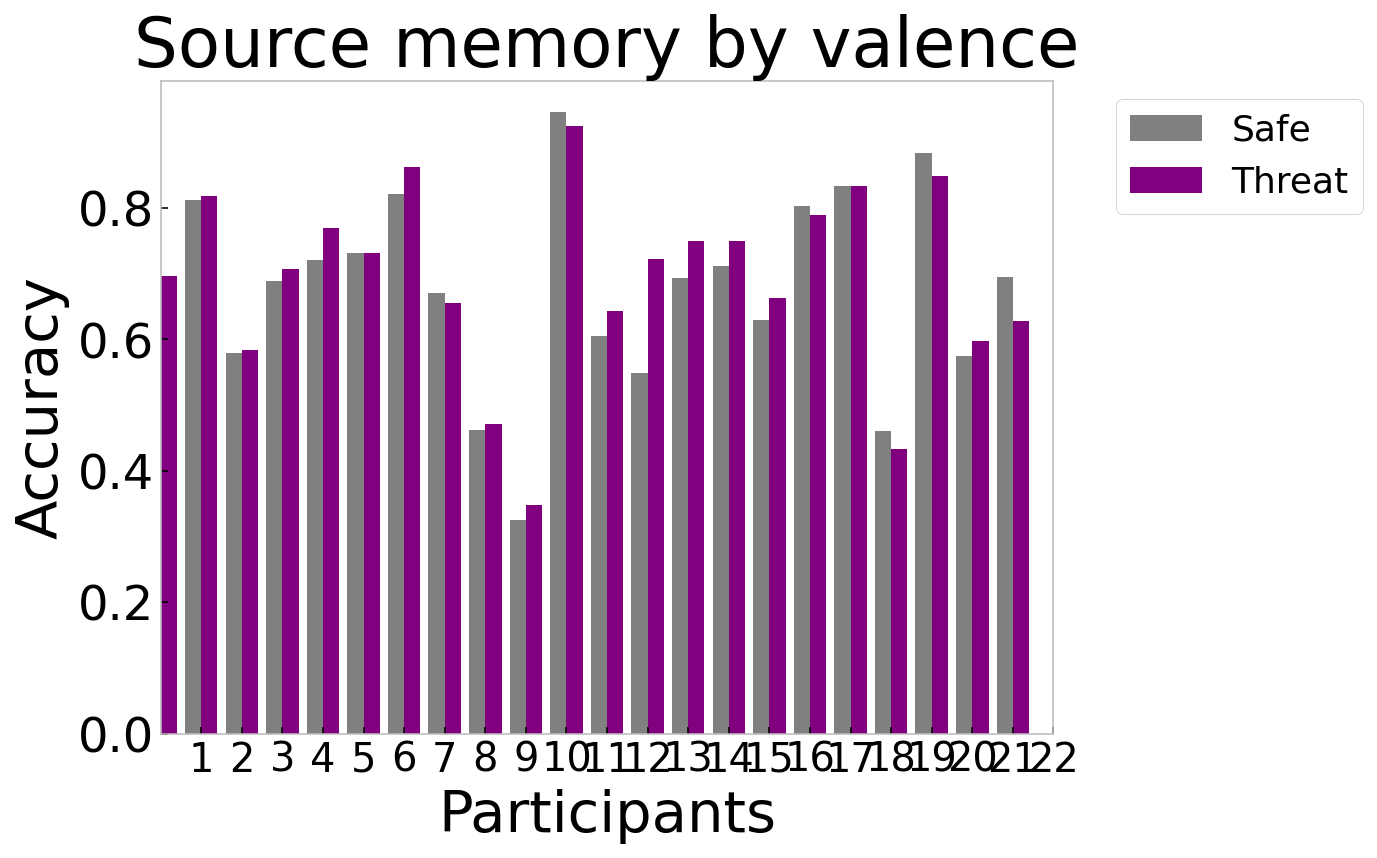

In [36]:
x_axis = np.arange(totalpts)
  
plt.bar(x_axis - 0.2, A, 0.4, label = 'Safe', color = "grey")
plt.bar(x_axis + 0.2, B, 0.4, label = 'Threat', color = "purple")

plt.xlabel("Participants")
plt.ylabel("Accuracy")
plt.title("Source memory by valence")
x_range = range(1, totalpts + 1)
plt.xlim (0, 10)
plt.xticks(x_range, fontsize = "small")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize = 18)
plt.show()